In [ ]:
import os
import librosa
import librosa.display
import pandas as pd
import numpy as np
import random

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import shutil
import soundfile as sf

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Caminho para os dados no Google Drive
file_path_real = '/content/drive/MyDrive/audios_FOR/amostra_FOR/real'
file_path_fake = '/content/drive/MyDrive/audios_FOR/amostra_FOR/fake'

In [ ]:
# Listar os arquivos e subpastas
print(os.listdir(file_path_real))
print(os.listdir(file_path_fake))

['file1061.wav', 'file1059.wav', 'file1143.wav', 'file1115.wav', 'file1147.wav', 'file1135.wav', 'file1139.wav', 'file154.wav', 'file155.wav', 'file10.wav', 'file1.wav', 'file1047.wav', 'file1046.wav', 'file1048.wav', 'file1050.wav', 'file1049.wav', 'file1052.wav', 'file1053.wav', 'file1055.wav', 'file1054.wav', 'file1056.wav', 'file1057.wav', 'file1058.wav', 'file1060.wav', 'file1063.wav', 'file1065.wav', 'file1064.wav', 'file1067.wav', 'file1068.wav', 'file1069.wav', 'file1070.wav', 'file10735.wav', 'file10728.wav', 'file10737.wav', 'file10727.wav', 'file1072.wav', 'file10732.wav', 'file10734.wav', 'file1071.wav', 'file10736.wav', 'file1073.wav', 'file10746.wav', 'file10762.wav', 'file10741.wav', 'file10755.wav', 'file10750.wav', 'file10738.wav', 'file10740.wav', 'file10758.wav', 'file10744.wav', 'file10739.wav', 'file10754.wav', 'file10757.wav', 'file10743.wav', 'file10742.wav', 'file10759.wav', 'file10760.wav', 'file10745.wav', 'file10747.wav', 'file10763.wav', 'file10826.wav', 'fi

In [ ]:
# Função para processar os áudios em uma pasta
def process_audio_files(folder_path):

    for audio_file in os.listdir(folder_path):
        audio_path = os.path.join(folder_path, audio_file)

        # Carregar o áudio
        y, sr = librosa.load(audio_path, sr=None)

        # Mostrar informações do áudio
        print(f"Arquivo: {audio_file}, Duração: {len(y) / sr:.2f}s, Taxa de amostragem: {sr}Hz")

        # Plotar waveform
        plt.figure(figsize=(10, 4))
        librosa.display.waveshow(y, sr=sr)
        plt.title(f"Waveform de {audio_file}")
        plt.xlabel("Tempo (s)")
        plt.ylabel("Amplitude")
        plt.show()

In [ ]:
# Processar áudios Real
#process_audio_files(file_path_real)

In [ ]:
# Processar áudios Fake
#process_audio_files(file_path_fake)

In [ ]:
# Função para extrair MFCCs de um arquivo
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return np.mean(mfccs.T, axis=0)  # Média dos coeficientes

# Carregar dados e rótulos
data = []
labels = []

# Processar Fake
for file_name in os.listdir(file_path_fake):
    file_path = os.path.join(file_path_fake, file_name)
    features = extract_features(file_path)
    data.append(features)
    labels.append(0)  # Rótulo 0 para Fake

# Processar Real
for file_name in os.listdir(file_path_real):
    file_path = os.path.join(file_path_real, file_name)
    features = extract_features(file_path)
    data.append(features)
    labels.append(1)  # Rótulo 1 para Real

In [ ]:
# Converter para DataFrame
df = pd.DataFrame(data)
df['label'] = labels

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,-310.484985,79.589180,12.035122,21.775892,7.463613,-4.327323,1.702638,5.056441,-11.605008,-8.825641,-12.136454,-8.166679,-7.886450,0
1,-292.760193,85.521347,-18.103905,14.233822,-1.934288,-8.300287,-15.360986,-14.333099,-0.524541,-12.453050,-2.744914,-14.212177,0.993812,0
2,-266.020477,106.608009,-11.326435,17.970966,-11.344944,1.250991,-5.587977,-6.984388,-5.437147,-10.668830,6.232262,-13.461805,6.319636,0
3,-260.005402,122.213196,-19.668991,8.698288,-10.487801,-3.308214,-5.397858,-11.390374,-4.951897,-11.585847,5.326418,-15.468590,5.036489,0
4,-270.677155,111.855637,-19.062414,5.179912,-16.694443,-4.503492,-10.268575,-12.212496,-1.401393,-12.573609,5.653296,-16.340860,3.830790,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,-296.089111,90.251648,49.353138,40.109879,13.949716,15.968038,-11.017990,1.806876,-6.369140,3.860376,-8.479083,-1.914927,-10.282051,1
555,-334.378174,76.736237,1.568514,22.846909,-14.486498,-16.314674,-15.556476,-21.469236,-20.530735,-1.497289,-14.830498,-3.666535,-10.663058,1
556,-323.235352,69.085464,4.084009,22.119936,-11.278208,-25.925304,-23.227936,-21.648048,-9.808347,-1.174033,-23.784948,1.368763,-17.619230,1
557,-312.793549,82.430946,3.129900,14.186769,-18.484079,-25.799473,-17.645624,-17.211958,-12.702026,-4.227543,-22.298204,0.184280,-17.449095,1


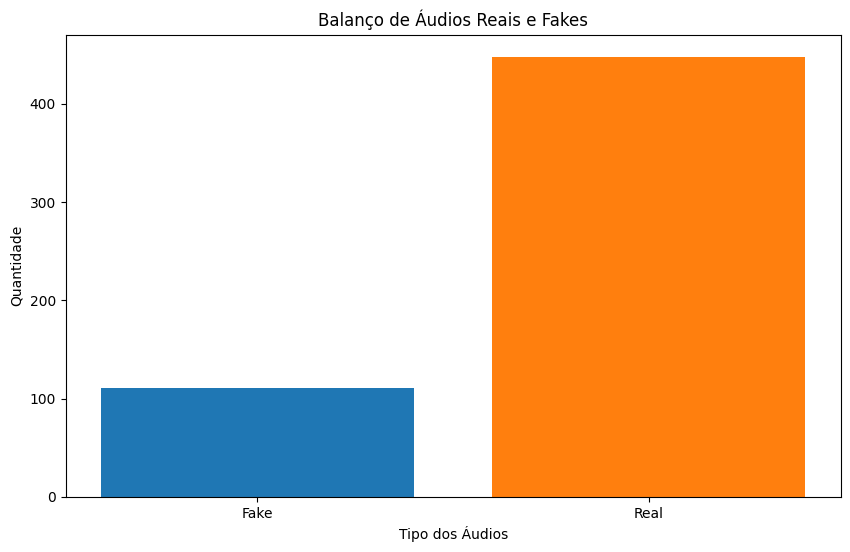

In [ ]:
# Contar as ocorrências de cada label
label_counts = [labels.count(0), labels.count(1)]

# Plotando o gráfico
plt.figure(figsize=(10, 6))  # Ajuste do tamanho do gráfico
plt.bar([0, 1], label_counts, tick_label=['Fake', 'Real'], color=['#1f77b4', '#ff7f0e'])

# Adicionando rótulos e título
plt.xlabel('Tipo dos Áudios')
plt.ylabel('Quantidade')
plt.title('Balanço de Áudios Reais e Fakes')
plt.show()

In [ ]:
# Separar características (X) e rótulos (y)
X = df.drop(columns=['label'])
y = df['label']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Definição do modelo DNN
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilação e treinamento do modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predições e métricas
y_pred_proba = model.predict(X_test)  # Predições de probabilidade
y_pred = (y_pred_proba > 0.5).astype(int)  # Converter para rótulos binários

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1709 - loss: 59.4871
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4157 - loss: 15.6708 
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7047 - loss: 5.3101 
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7672 - loss: 5.2730 
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6788 - loss: 4.3757 
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6704 - loss: 2.6680 
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7120 - loss: 1.8529 
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7467 - loss: 1.2922 
Epoch 9/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7836 - loss: 0.7377 
Epoch 10/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8214 - loss: 0.4770  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.80
Precisão: 0.80
Recall: 0.96
F1-Score: 0.88


In [ ]:
# Treinando um modelo de regressão linear
model = RandomForestClassifier()
rfc = model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = rfc.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.88
Precisão: 0.85
Recall: 1.00
F1-Score: 0.92


In [ ]:
# Treinando um modelo knc
model = KNeighborsClassifier()
knc = model.fit(X_train,y_train)

# Fazendo previsões no conjunto de teste
y_pred = knc.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.90
Precisão: 0.90
Recall: 0.98
F1-Score: 0.93


In [ ]:
model = XGBClassifier()
xgb = model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = xgb.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.88
Precisão: 0.88
Recall: 0.96
F1-Score: 0.92


In [ ]:
model = LGBMClassifier(n_estimators=100, learning_rate=0.1, num_leaves=31)
LGBMC = model.fit(X_train, y_train)

y_pred = LGBMC.predict(X_test)

[LightGBM] [Info] Number of positive: 367, number of negative: 80
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1948
[LightGBM] [Info] Number of data points in the train set: 447, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.821029 -> initscore=1.523335
[LightGBM] [Info] Start training from score 1.523335
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.92
Precisão: 0.92
Recall: 0.98
F1-Score: 0.95


In [ ]:
# Definição do modelo
input_shape = (X_train.shape[1],)  # Número de colunas do conjunto de treino
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilação e treinamento
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predições e métricas
y_pred_proba = model.predict(X_test)  # Predições de probabilidade
y_pred = (y_pred_proba > 0.5).astype(int)  # Converter para rótulos binários

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6331 - loss: 3.0695
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7364 - loss: 1.4016 
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7430 - loss: 1.0202 
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7783 - loss: 0.8292 
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7673 - loss: 0.8069 
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8018 - loss: 0.6989 
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8361 - loss: 0.5432 
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8535 - loss: 0.4892 
Epoch 9/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8530 - loss: 0.4647 
Epoch 10/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8373 - loss: 0.3832 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.83
Precisão: 0.83
Recall: 0.96
F1-Score: 0.89


In [ ]:
model = DecisionTreeClassifier(criterion='gini', random_state=42)
DTC = model.fit(X_train, y_train)

y_pred = DTC.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.88
Precisão: 0.87
Recall: 0.98
F1-Score: 0.92


In [ ]:
# Definição do modelo Conv1D
input_shape = (X_train.shape[1], 1)  # Número de características e 1 canal
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilação e treinamento do modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predições e métricas
y_pred_proba = model.predict(X_test)  # Predições de probabilidade
y_pred = (y_pred_proba > 0.5).astype(int)  # Converter para rótulos binários

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2709 - loss: 6.6565 
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8075 - loss: 1.7659 
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8036 - loss: 1.2650 
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7266 - loss: 0.7363 
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7716 - loss: 0.7081 
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8022 - loss: 0.4778 
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8250 - loss: 0.4315 
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8109 - loss: 0.4343 
Epoch 9/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8247 - loss: 0.3733 
Epoch 10/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8618 - loss: 0.3251 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.85
Precisão: 0.85
Recall: 0.96
F1-Score: 0.90


In [ ]:
def add_noise(y, noise_factor=0.005):
    noise = np.random.randn(len(y))
    y_noise = y + noise_factor * noise
    return y_noise

In [ ]:
# Caminho para os dados no Google Drive
output_path = '/content/drive/MyDrive/audios_FOR/amostra_FOR_ruido'

# Criação das pastas de destino se não existirem
os.makedirs(os.path.join(output_path, 'real'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'fake'), exist_ok=True)

# Listas para armazenar as características e rótulos com ruído
data_noise = []  # Dados com ruído
labels_noise = []  # Rótulos com ruído

# Processar Fake
for file_name in os.listdir(file_path_fake):
    file_path = os.path.join(file_path_fake, file_name)
    y, sr = librosa.load(file_path, sr=None)

    # Versão original
    features = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    data_noise.append(features)
    labels_noise.append(0)  # Rótulo "fake"

    # Adicionando ruído
    y_noise = add_noise(y)  # Adicionando ruído
    features_noise = np.mean(librosa.feature.mfcc(y=y_noise, sr=sr, n_mfcc=13).T, axis=0)
    data_noise.append(features_noise)
    labels_noise.append(0)  # Rótulo "fake"

    # Salvar áudio original na pasta 'fake'
    output_file_path = os.path.join(output_path, 'fake', file_name)
    sf.write(output_file_path, y, sr)  # Salvando a versão original

    # Salvar áudio com ruído na pasta 'fake' (com sufixo "_ruido")
    output_file_path_ruido = os.path.join(output_path, 'fake', file_name.replace('.wav', '_ruido.wav'))
    sf.write(output_file_path_ruido, y_noise, sr)  # Salvando a versão com ruído

# Processar Real
for file_name in os.listdir(file_path_real):
    file_path = os.path.join(file_path_real, file_name)
    y, sr = librosa.load(file_path, sr=None)

    # Versão original
    features = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    data_noise.append(features)
    labels_noise.append(1)  # Rótulo "real"

    # Adicionando ruído
    y_noise = add_noise(y)  # Adicionando ruído
    features_noise = np.mean(librosa.feature.mfcc(y=y_noise, sr=sr, n_mfcc=13).T, axis=0)
    data_noise.append(features_noise)
    labels_noise.append(1)  # Rótulo "real"

    # Salvar áudio original na pasta 'real'
    output_file_path = os.path.join(output_path, 'real', file_name)
    sf.write(output_file_path, y, sr)  # Salvando a versão original

    # Salvar áudio com ruído na pasta 'real' (com sufixo "_ruido")
    output_file_path_ruido = os.path.join(output_path, 'real', file_name.replace('.wav', '_ruido.wav'))
    sf.write(output_file_path_ruido, y_noise, sr)  # Salvando a versão com ruído

In [ ]:
# Converter para DataFrame
df_noise = pd.DataFrame(data_noise)
df_noise['label'] = labels_noise

In [ ]:
df_noise

,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,-310.484985,79.589180,12.035122,21.775892,7.463613,-4.327323,1.702638,5.056441,-11.605008,-8.825641,-12.136454,-8.166679,-7.886450,0
1,-226.493253,50.876963,18.109996,15.960763,7.133637,-1.813516,0.641222,3.399988,-8.103005,-9.964034,-8.749639,-7.733733,-7.577502,0
2,-292.760193,85.521347,-18.103905,14.233822,-1.934288,-8.300287,-15.360986,-14.333099,-0.524541,-12.453050,-2.744914,-14.212177,0.993812,0
3,-209.968600,57.221235,-6.461845,6.053241,0.845262,-7.485686,-15.322666,-10.757095,-4.761020,-6.900677,-7.568161,-8.183097,-3.377895,0
4,-266.020477,106.608009,-11.326435,17.970966,-11.344944,1.250991,-5.587977,-6.984388,-5.437147,-10.668830,6.232262,-13.461805,6.319636,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,-229.467114,31.107734,6.983634,11.330755,-7.389324,-15.537270,-17.156863,-14.316045,-8.486195,-4.112575,-11.461081,-1.635118,-8.066796,1
1114,-312.793549,82.430946,3.129900,14.186769,-18.484079,-25.799473,-17.645624,-17.211958,-12.702026,-4.227543,-22.298204,0.184280,-17.449095,1
1115,-227.655668,42.641709,11.521477,6.574401,-9.096692,-17.925106,-15.750295,-9.619601,-10.815373,-6.172114,-10.262457,-3.086372,-7.581989,1
1116,-432.503387,52.231987,24.130854,24.908005,5.230207,10.177417,1.667769,11.312072,14.200116,13.155353,9.546826,18.923155,7.199302,1


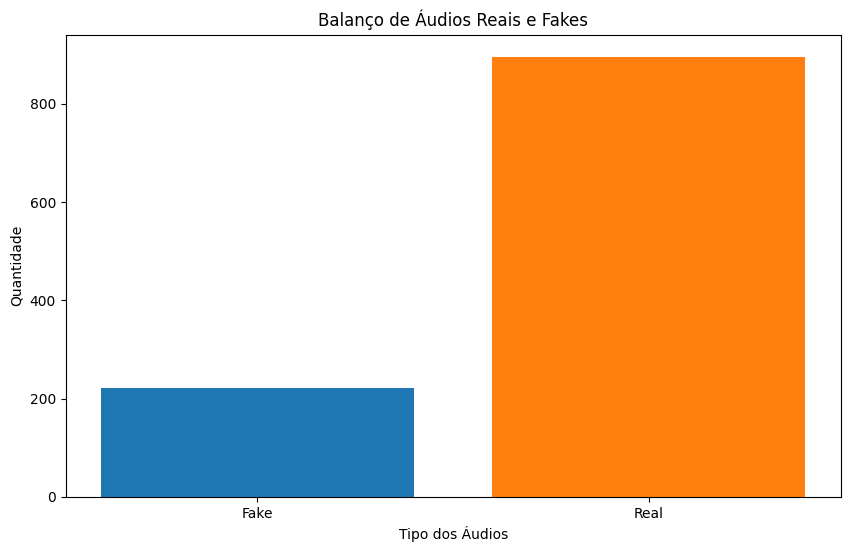

In [ ]:
# Contar as ocorrências de cada label
label_counts = [labels_noise.count(0), labels_noise.count(1)]

# Plotando o gráfico
plt.figure(figsize=(10, 6))  # Ajuste do tamanho do gráfico
plt.bar([0, 1], label_counts, tick_label=['Fake', 'Real'], color=['#1f77b4', '#ff7f0e'])

# Adicionando rótulos e título
plt.xlabel('Tipo dos Áudios')
plt.ylabel('Quantidade')
plt.title('Balanço de Áudios Reais e Fakes')
plt.show()

In [ ]:
# Separar características (X) e rótulos (y)
X = df_noise.drop(columns=['label'])
y = df_noise['label']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Definição do modelo DNN
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilação e treinamento do modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predições e métricas
y_pred_proba = model.predict(X_test)  # Predições de probabilidade
y_pred = (y_pred_proba > 0.5).astype(int)  # Converter para rótulos binários

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2232 - loss: 39.2880
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8064 - loss: 4.1290 
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6473 - loss: 1.3338 
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7086 - loss: 0.8702 
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7747 - loss: 0.5728 
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8107 - loss: 0.4735 
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8250 - loss: 0.4709 
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8256 - loss: 0.4391 
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8377 - loss: 0.3997 
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8347 - loss: 0.4134 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.82
Precisão: 0.82
Recall: 0.98
F1-Score: 0.89


In [ ]:
# Treinando um modelo de regressão linear
model = RandomForestClassifier()
rfc = model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = rfc.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.86
Precisão: 0.87
Recall: 0.97
F1-Score: 0.92


In [ ]:
# Treinando um modelo knc
model = KNeighborsClassifier()
knc = model.fit(X_train,y_train)

# Fazendo previsões no conjunto de teste
y_pred = knc.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.88
Precisão: 0.90
Recall: 0.95
F1-Score: 0.93


In [ ]:
model = XGBClassifier()
xgb = model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = xgb.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.91
Precisão: 0.92
Recall: 0.97
F1-Score: 0.94


In [ ]:
model = LGBMClassifier(n_estimators=100, learning_rate=0.1, num_leaves=31)
LGBMC = model.fit(X_train, y_train)

y_pred = LGBMC.predict(X_test)

[LightGBM] [Info] Number of positive: 720, number of negative: 174
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000264 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 894, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.805369 -> initscore=1.420196
[LightGBM] [Info] Start training from score 1.420196
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.93
Precisão: 0.94
Recall: 0.97
F1-Score: 0.96


In [ ]:
# Definição do modelo
input_shape = (X_train.shape[1],)  # Número de colunas do conjunto de treino
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilação e treinamento
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predições e métricas
y_pred_proba = model.predict(X_test)  # Predições de probabilidade
y_pred = (y_pred_proba > 0.5).astype(int)  # Converter para rótulos binários

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8217 - loss: 9.3465
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6595 - loss: 1.6980
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7049 - loss: 0.8550
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7877 - loss: 0.5788
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8074 - loss: 0.4914
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8044 - loss: 0.4425
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8467 - loss: 0.3792
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8288 - loss: 0.3937
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8617 - loss: 0.3621
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8632 - loss: 0.3410
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.80
Precisão: 0.81
Recall: 0.98
F1-Score: 0.89


In [ ]:
model = DecisionTreeClassifier(criterion='gini', random_state=42)
DTC = model.fit(X_train, y_train)

y_pred = DTC.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.84
Precisão: 0.90
Recall: 0.89
F1-Score: 0.90


In [ ]:
# Definição do modelo Conv1D
input_shape = (X_train.shape[1], 1)  # Número de características e 1 canal
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilação e treinamento do modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predições e métricas
y_pred_proba = model.predict(X_test)  # Predições de probabilidade
y_pred = (y_pred_proba > 0.5).astype(int)  # Converter para rótulos binários

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6705 - loss: 2.2509
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7341 - loss: 1.0880 
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7834 - loss: 0.6576 
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8107 - loss: 0.4369 
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8154 - loss: 0.4075 
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8271 - loss: 0.3766 
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8472 - loss: 0.3566  
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8718 - loss: 0.3180 
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8875 - loss: 0.3185
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8771 - loss: 0.3137 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.83
Precisão: 0.86
Recall: 0.94
F1-Score: 0.90


In [ ]:
output_path_balanced = '/content/drive/MyDrive/audios_FOR/amostra_FOR_ruido_balanced'

# Criação das pastas de destino se não existirem
os.makedirs(os.path.join(output_path_balanced, 'real'), exist_ok=True)
os.makedirs(os.path.join(output_path_balanced, 'fake'), exist_ok=True)

# Listas para armazenar as características e rótulos com ruído
data_noise_balanced = []  # Dados com ruído
labels_noise_balanced = []  # Rótulos com ruído

# Função para balancear os dados usando replicação simples
def balance_data(real_files, fake_files):
    """Balanceia os dados replicando aleatoriamente as amostras da classe minoritária."""
    len_real = len(real_files)
    len_fake = len(fake_files)

    # Verificar qual classe tem menos amostras
    if len_real > len_fake:
        # Replicar os arquivos 'fake' até igualar o número
        fake_files += random.choices(fake_files, k=len_real - len_fake)
    elif len_fake > len_real:
        # Replicar os arquivos 'real' até igualar o número
        real_files += random.choices(real_files, k=len_fake - len_real)

    return real_files, fake_files

# Obter listas de arquivos reais e fakes
real_files = os.listdir(file_path_real)
fake_files = os.listdir(file_path_fake)

# Balancear os arquivos
real_files, fake_files = balance_data(real_files, fake_files)

# Processar Fake
for file_name in fake_files:
    file_path = os.path.join(file_path_fake, file_name)
    y, sr = librosa.load(file_path, sr=None)

    # Versão original
    features = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    data_noise_balanced.append(features)
    labels_noise_balanced.append(0)  # Rótulo "fake"

    # Adicionando ruído
    y_noise = add_noise(y)  # Adicionando ruído
    features_noise = np.mean(librosa.feature.mfcc(y=y_noise, sr=sr, n_mfcc=13).T, axis=0)
    data_noise_balanced.append(features_noise)
    labels_noise_balanced.append(0)  # Rótulo "fake"

    # Salvar áudio original na pasta 'fake'
    output_file_path = os.path.join(output_path, 'fake', file_name)
    sf.write(output_file_path, y, sr)  # Salvando a versão original

    # Salvar áudio com ruído na pasta 'fake' (com sufixo "_ruido")
    output_file_path_ruido = os.path.join(output_path_balanced, 'fake', file_name.replace('.wav', '_ruido.wav'))
    sf.write(output_file_path_ruido, y_noise, sr)  # Salvando a versão com ruído balanceado

# Processar Real
for file_name in real_files:
    file_path = os.path.join(file_path_real, file_name)
    y, sr = librosa.load(file_path, sr=None)

    # Versão original
    features = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    data_noise_balanced.append(features)
    labels_noise_balanced.append(1)  # Rótulo "real"

    # Adicionando ruído
    y_noise = add_noise(y)  # Adicionando ruído
    features_noise = np.mean(librosa.feature.mfcc(y=y_noise, sr=sr, n_mfcc=13).T, axis=0)
    data_noise_balanced.append(features_noise)
    labels_noise_balanced.append(1)  # Rótulo "real"

    # Salvar áudio original na pasta 'real'
    output_file_path = os.path.join(output_path, 'real', file_name)
    sf.write(output_file_path, y, sr)  # Salvando a versão original

    # Salvar áudio com ruído na pasta 'real' (com sufixo "_ruido")
    output_file_path_ruido = os.path.join(output_path_balanced, 'real', file_name.replace('.wav', '_ruido.wav'))
    sf.write(output_file_path_ruido, y_noise, sr)  # Salvando a versão com ruído balanceado

In [ ]:
# Converter para DataFrame
df_noise_balanced = pd.DataFrame(data_noise_balanced)
df_noise_balanced['label'] = labels_noise_balanced

In [ ]:
df_noise_balanced

,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,-310.484985,79.589180,12.035122,21.775892,7.463613,-4.327323,1.702638,5.056441,-11.605008,-8.825641,-12.136454,-8.166679,-7.886450,0
1,-226.230279,51.245758,18.076954,15.587418,7.817423,-1.736315,0.046570,2.861965,-9.015771,-10.006898,-8.805674,-7.778575,-7.618876,0
2,-292.760193,85.521347,-18.103905,14.233822,-1.934288,-8.300287,-15.360986,-14.333099,-0.524541,-12.453050,-2.744914,-14.212177,0.993812,0
3,-209.801008,57.271007,-5.783630,5.993517,0.734956,-7.379201,-14.861756,-11.294625,-4.934975,-7.535623,-7.869636,-8.242605,-3.319850,0
4,-266.020477,106.608009,-11.326435,17.970966,-11.344944,1.250991,-5.587977,-6.984388,-5.437147,-10.668830,6.232262,-13.461805,6.319636,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,-229.994404,30.805363,6.971231,11.794870,-6.811985,-15.166875,-17.540457,-14.625664,-8.848973,-3.793742,-11.095669,-1.735747,-8.533566,1
1788,-312.793549,82.430946,3.129900,14.186769,-18.484079,-25.799473,-17.645624,-17.211958,-12.702026,-4.227543,-22.298204,0.184280,-17.449095,1
1789,-227.619294,42.327820,11.354583,6.251240,-9.517845,-18.449841,-15.698469,-9.420115,-10.882242,-6.520479,-10.782418,-3.533291,-7.558640,1
1790,-432.503387,52.231987,24.130854,24.908005,5.230207,10.177417,1.667769,11.312072,14.200116,13.155353,9.546826,18.923155,7.199302,1


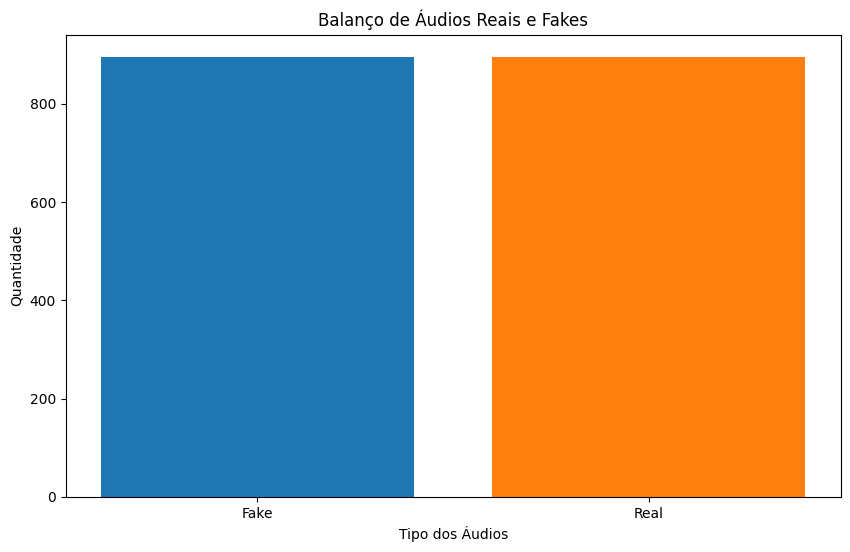

In [ ]:
# Contar as ocorrências de cada label
label_counts = [labels_noise_balanced.count(0), labels_noise_balanced.count(1)]

# Plotando o gráfico
plt.figure(figsize=(10, 6))  # Ajuste do tamanho do gráfico
plt.bar([0, 1], label_counts, tick_label=['Fake', 'Real'], color=['#1f77b4', '#ff7f0e'])

# Adicionando rótulos e título
plt.xlabel('Tipo dos Áudios')
plt.ylabel('Quantidade')
plt.title('Balanço de Áudios Reais e Fakes')
plt.show()

In [ ]:
# Separar características (X) e rótulos (y)
X = df_noise_balanced.drop(columns=['label'])
y = df_noise_balanced['label']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Definição do modelo DNN
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilação e treinamento do modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predições e métricas
y_pred_proba = model.predict(X_test)  # Predições de probabilidade
y_pred = (y_pred_proba > 0.5).astype(int)  # Converter para rótulos binários

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5342 - loss: 4.1815
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6905 - loss: 0.8295
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7541 - loss: 0.5922
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7545 - loss: 0.5373
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7930 - loss: 0.4624
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7667 - loss: 0.5051
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7997 - loss: 0.4486
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8148 - loss: 0.4126
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8038 - loss: 0.4080
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7901 - loss: 0.4488
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.84
Precisão: 0.90
Recall: 0.77
F1-Score: 0.83


In [ ]:
# Treinando um modelo de regressão linear
model = RandomForestClassifier()
rfc = model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = rfc.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.98
Precisão: 0.99
Recall: 0.96
F1-Score: 0.98


In [ ]:
# Treinando um modelo knc
model = KNeighborsClassifier()
knc = model.fit(X_train,y_train)

# Fazendo previsões no conjunto de teste
y_pred = knc.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.93
Precisão: 0.98
Recall: 0.88
F1-Score: 0.93


In [ ]:
model = XGBClassifier()
xgb = model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = xgb.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.97
Precisão: 0.99
Recall: 0.96
F1-Score: 0.97


In [ ]:
model = LGBMClassifier(n_estimators=100, learning_rate=0.1, num_leaves=31)
LGBMC = model.fit(X_train, y_train)

y_pred = LGBMC.predict(X_test)

[LightGBM] [Info] Number of positive: 716, number of negative: 717
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 1433, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499651 -> initscore=-0.001396
[LightGBM] [Info] Start training from score -0.001396


In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.97
Precisão: 1.00
Recall: 0.95
F1-Score: 0.97


In [ ]:
# Definição do modelo
input_shape = (X_train.shape[1],)  # Número de colunas do conjunto de treino
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilação e treinamento
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predições e métricas
y_pred_proba = model.predict(X_test)  # Predições de probabilidade
y_pred = (y_pred_proba > 0.5).astype(int)  # Converter para rótulos binários

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4923 - loss: 13.7066
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5222 - loss: 1.9468
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6423 - loss: 0.8957
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6724 - loss: 0.7074
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7293 - loss: 0.5972
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7519 - loss: 0.5302
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7535 - loss: 0.5136
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7731 - loss: 0.4761
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7828 - loss: 0.4685
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7893 - loss: 0.4621
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.79
Precisão: 0.90
Recall: 0.66
F1-Score: 0.76


In [ ]:
model = DecisionTreeClassifier(criterion='gini', random_state=42)
DTC = model.fit(X_train, y_train)

y_pred = DTC.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.92
Precisão: 0.92
Recall: 0.92
F1-Score: 0.92


In [ ]:
# Definição do modelo Conv1D
input_shape = (X_train.shape[1], 1)  # Número de características e 1 canal
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilação e treinamento do modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predições e métricas
y_pred_proba = model.predict(X_test)  # Predições de probabilidade
y_pred = (y_pred_proba > 0.5).astype(int)  # Converter para rótulos binários

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4968 - loss: 5.4328
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6018 - loss: 0.7560
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7165 - loss: 0.5840
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7634 - loss: 0.5008
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8116 - loss: 0.4552
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7922 - loss: 0.4649
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8025 - loss: 0.4478
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8226 - loss: 0.4389
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7969 - loss: 0.4424
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8109 - loss: 0.4197
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.83
Precisão: 0.86
Recall: 0.79
F1-Score: 0.82
